# Weather in Szeged

## Packages

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

## Loading Data

In [5]:
weather_data = pd.read_csv('cleaned_weatherHistory.csv')
weather_data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Cloud Cover,Pressure (millibars),Daily Summary,Year,Month,Day,Hour
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006,3,31,22
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006,3,31,23
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006,4,1,0
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006,4,1,1
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006,4,1,2


## Data Cleaning and Filtering

In [6]:
# Converting 'Formatted Date' to datetime
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)

# Extracting useful information from the datetime column
data['Year'] = data['Formatted Date'].dt.year
data['Month'] = data['Formatted Date'].dt.month
data['Day'] = data['Formatted Date'].dt.day
data['Hour'] = data['Formatted Date'].dt.hour


# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# Drop rows with missing values
data = data.dropna()

# Checking for duplicate rows
duplicates = data.duplicated().sum()
print(f"\nDuplicates: {duplicates}")

# Droppping duplicates
data = data.drop_duplicates()

data.rename(columns={'Loud Cover': 'Cloud Cover'}, inplace=True)

# Saving the cleaned dataset to a new file
data.to_csv('cleaned_weatherHistory.csv', index=False)

print("\nCleaned Data:")
print(data.head())


Missing Values:
Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
Year                          0
Month                         0
Day                           0
Hour                          0
dtype: int64

Duplicates: 24

Cleaned Data:
             Formatted Date        Summary Precip Type  Temperature (C)  \
0 2006-03-31 22:00:00+00:00  Partly Cloudy        rain         9.472222   
1 2006-03-31 23:00:00+00:00  Partly Cloudy        rain         9.355556   
2 2006-04-01 00:00:00+00:00  Mostly Cloudy        rain         9.377778   
3 2006-04-01 01:00:00+00:00  Partly Cloudy        rain         8.288889   
4 2006-04-01 02:00:00+00:00  Mostly Cloudy        ra

# Exploratory Data Analysis

In [6]:
# Convert 'Formatted Date' to datetime and set it as the index
weather_data['Formatted Date'] = pd.to_datetime(weather_data['Formatted Date'])
weather_data.set_index('Formatted Date', inplace=True)

In [7]:
# Resample to daily average temperature
daily_temp = weather_data['Temperature (C)'].resample('D').mean()

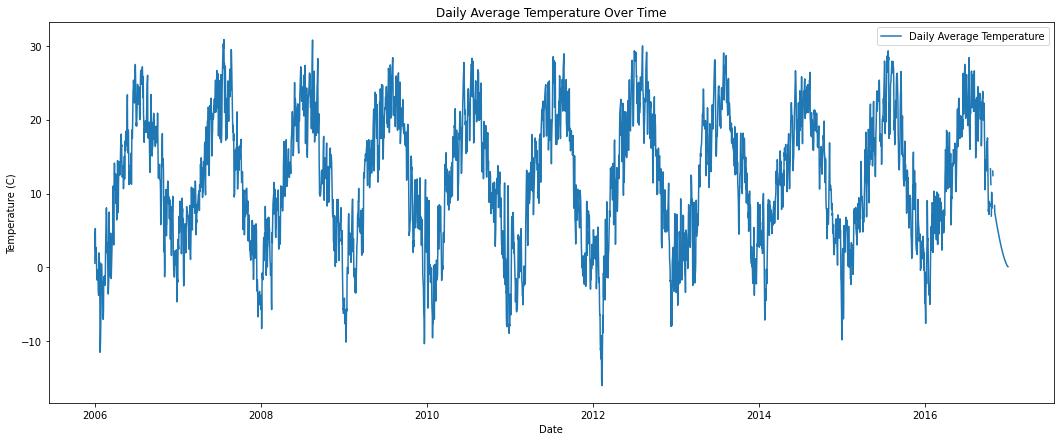

In [16]:
# Plot the daily temperature
plt.figure(figsize=(18, 7))
plt.plot(daily_temp, label='Daily Average Temperature')
plt.title('Daily Average Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.legend()
plt.show()

In [17]:
# Display basic statistics
daily_temp.describe()

count    4009.000000
mean       11.935768
std         8.797238
min       -15.958796
25%         5.004630
50%        12.220370
75%        19.196296
max        30.814352
Name: Temperature (C), dtype: float64

Count: 4009 days of data.
Mean: 11.94°C
Min/Max: Ranges from -15.96°C to 30.81°C.
Standard Deviation: 8.80°C, indicating moderate variability

Temperature: is the measure of the warmth or coldness of the air around us, typically measured with a thermometer. It refers to the actual ambient air temperature at a given location and time, regardless of other factors like wind or humidity.

Apparent Temperature: is how the temperature feels to the human body when wind and humidity are factored in. On windy days, the wind can make the air feel cooler than the actual air temperature. Wind removes heat from the body more quickly, which makes it feel colder.

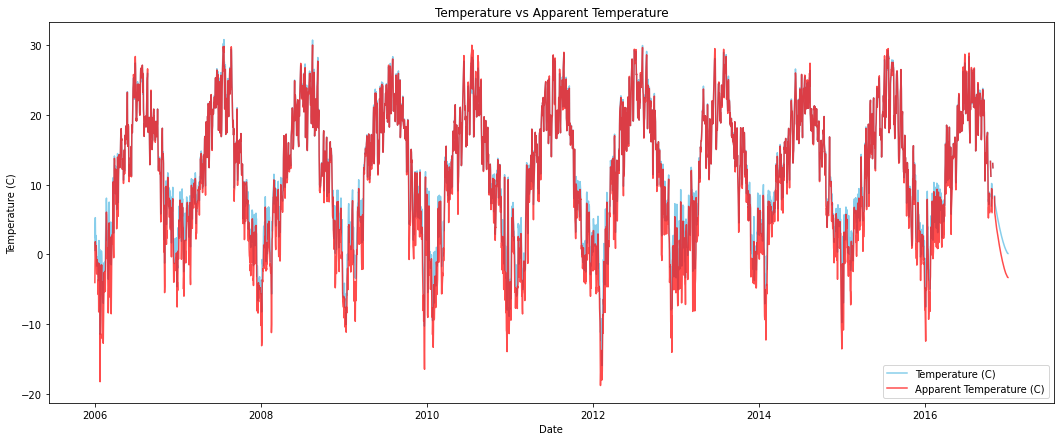

In [63]:
# Plot Temperature vs. Apparent Temperature
plt.figure(figsize=(18, 7))
plt.plot(daily_temp, label='Temperature (C)', color='skyblue')
plt.plot(weather_data['Apparent Temperature (C)'].resample('D').mean(), label='Apparent Temperature (C)', alpha=0.7, color='red')
plt.title('Temperature vs Apparent Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.legend()
plt.show()

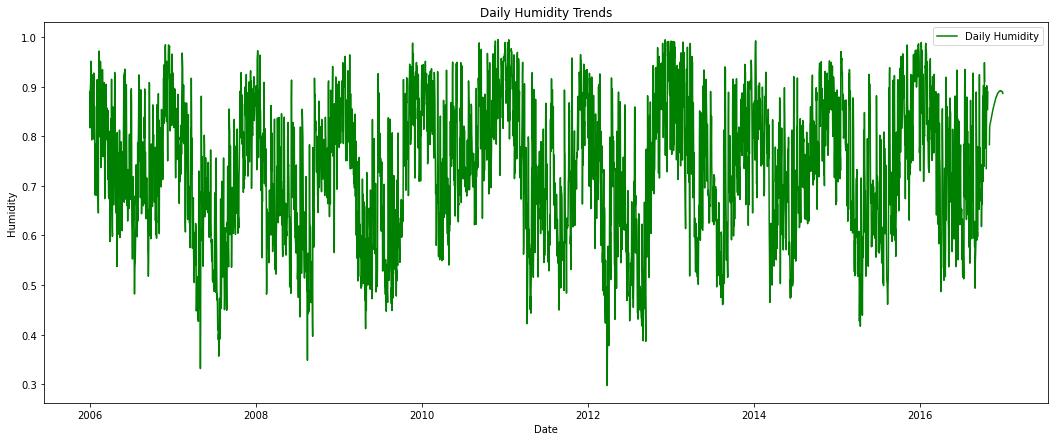

In [28]:
# Plot humidity trends
daily_humidity = weather_data['Humidity'].resample('D').mean()
plt.figure(figsize=(18, 7))
plt.plot(daily_humidity, label='Daily Humidity', color='green')
plt.title('Daily Humidity Trends')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.legend()
plt.show()

In [29]:
# Correlation with Temperature
correlation = daily_temp.corr(daily_humidity)
print(f"Correlation between Temperature and Humidity: {correlation:.2f}")

Correlation between Temperature and Humidity: -0.59


There's a moderate negative correlation, this indicates that as temperature increases humidity tends to decrease.

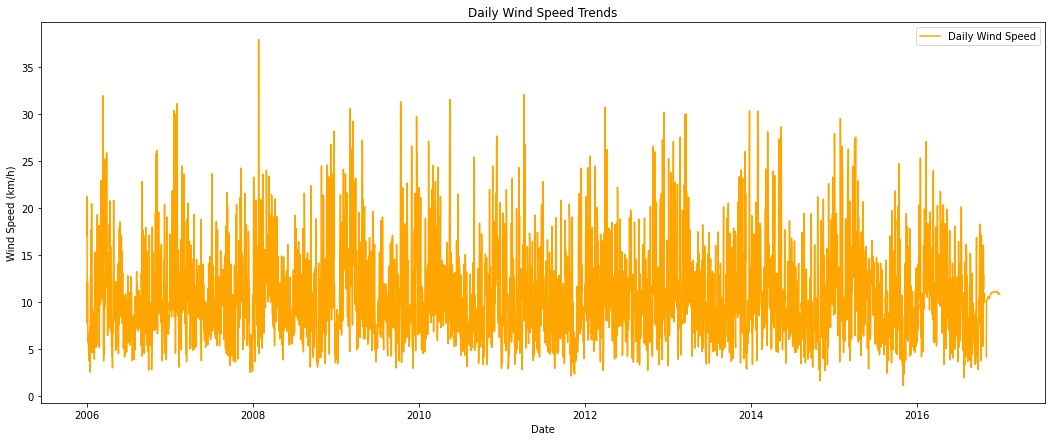

In [31]:
# Plot Wind Speed trends
daily_wind_speed = weather_data['Wind Speed (km/h)'].resample('D').mean()
plt.figure(figsize=(18, 7))
plt.plot(daily_wind_speed, label='Daily Wind Speed', color='orange')
plt.title('Daily Wind Speed Trends')
plt.xlabel('Date')
plt.ylabel('Wind Speed (km/h)')
plt.legend()
plt.show()

In [32]:
# Correlation with Temperature
correlation_wind = daily_temp.corr(daily_wind_speed)
print(f"Correlation between Temperature and Wind Speed: {correlation_wind:.2f}")

Correlation between Temperature and Wind Speed: -0.14


There is very weak negative correlation, there is a slight tendency for higher temperatures to be associated with lower wind speeds, but the relationship is very weak and almost negligible. Wind speed does not play a significant role in explaining variations in temperature in this dataset.

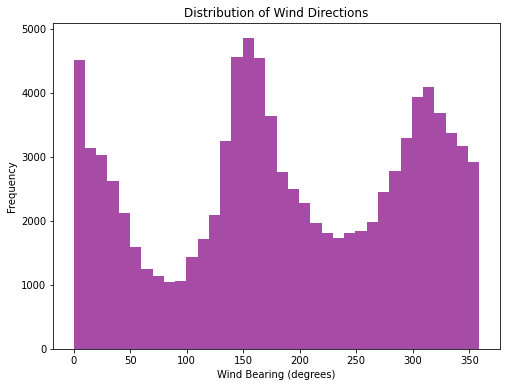

In [33]:
# Analyze the distribution of wind direction
plt.figure(figsize=(8, 6))
weather_data['Wind Bearing (degrees)'].plot(kind='hist', bins=36, color='purple', alpha=0.7)
plt.title('Distribution of Wind Directions')
plt.xlabel('Wind Bearing (degrees)')
plt.ylabel('Frequency')
plt.show()

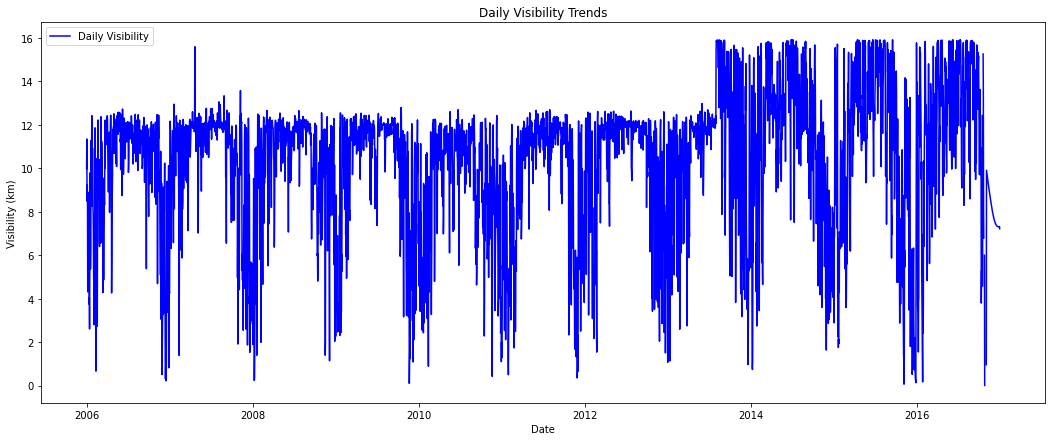

In [35]:
# Plot Visibility trends
daily_visibility = weather_data['Visibility (km)'].resample('D').mean()
plt.figure(figsize=(18, 7))
plt.plot(daily_visibility, label='Daily Visibility', color='blue')
plt.title('Daily Visibility Trends')
plt.xlabel('Date')
plt.ylabel('Visibility (km)')
plt.legend()
plt.show()

In [36]:
# Correlation with Temperature
correlation_visibility = daily_temp.corr(daily_visibility)
print(f"Correlation between Temperature and Visibility: {correlation_visibility:.2f}")

Correlation between Temperature and Visibility: 0.58


There is a moderate positive correlation, indicating that warmer days are generally clearer, with less haze or obstruction to visibility. As temperature increases, visibility tends to improve.

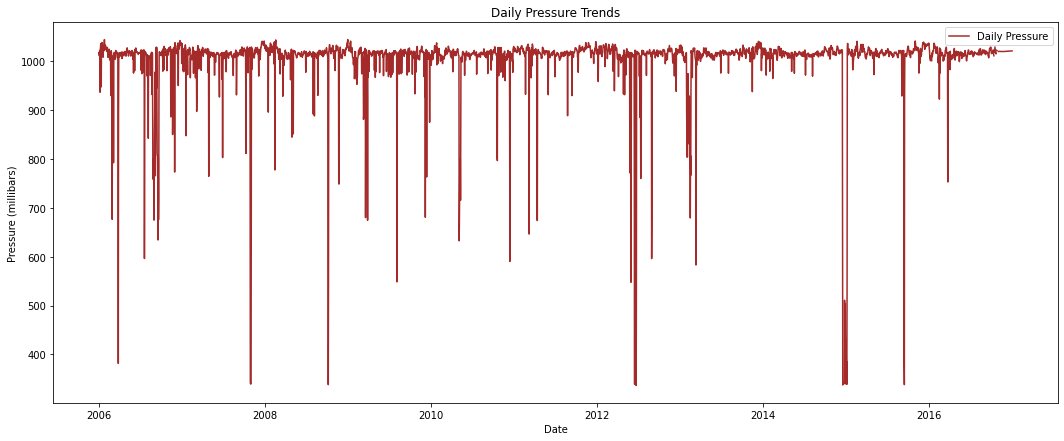

In [38]:
# Plot Pressure trends
daily_pressure = weather_data['Pressure (millibars)'].resample('D').mean()
plt.figure(figsize=(18, 7))
plt.plot(daily_pressure, label='Daily Pressure', color='brown')
plt.title('Daily Pressure Trends')
plt.xlabel('Date')
plt.ylabel('Pressure (millibars)')
plt.legend()
plt.show()

In [39]:
# Correlation with Temperature
correlation_pressure = daily_temp.corr(daily_pressure)
print(f"Correlation between Temperature and Pressure: {correlation_pressure:.2f}")

Correlation between Temperature and Pressure: -0.00


The correlation of -0.00 indicates no linear relationship between temperature and pressure

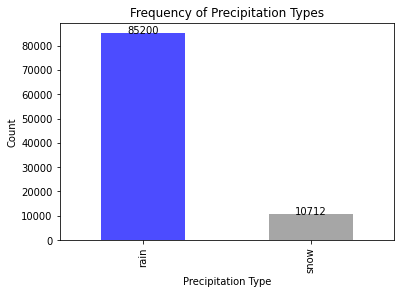

In [43]:
# Analyze the frequency of precipitation types
precipitation_counts = weather_data['Precip Type'].value_counts()
# Plot the bar chart
ax = precipitation_counts.plot(kind='bar', color=['blue', 'gray'], alpha=0.7)
# Add counts on top of bars
for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() + i.get_width() / 2, i.get_height()), ha='center', va='baseline')

plt.title('Frequency of Precipitation Types')
plt.xlabel('Precipitation Type')
plt.ylabel('Count')
plt.show()

-The high frequency of rain (approximately 89% of precipitation events) indicates that Szeged experiences a climate where rain is the dominant form of precipitation throughout the year.

-Snow occurs much less frequently (about 11%), suggesting that Szeged has milder winters compared to regions where snow is more common.